In [34]:
import pandas as pd
df = pd.read_csv('route_perf_clusters_JG.csv')
df



,route_cluster,diff_altitude,geo_distance,heart_rate_avg,speed_avg,elapsed_time
0,0,91.140003,0.116039,0.569419,5.489275,13686.710670
1,0,91.140003,0.116039,144.294068,0.080629,8824.291070
2,0,91.140003,0.116039,4.241273,7.349688,5651.000001
3,1,748.886323,0.199418,0.001804,10.780906,2463.874961
4,1,748.886323,0.199418,114.331164,0.004209,2616.778503
5,1,748.886323,0.199418,151.729009,11.231233,2511.797932
6,2,271.715967,0.161234,0.035708,0.013618,7249.971655
7,2,271.715967,0.161234,149.865734,1.581678,7218.751717
8,2,271.715967,0.161234,2.292948,11.701572,7183.089504
9,3,22.129643,0.083480,112.755523,0.204287,4287.412081


In [36]:
df_perf_all = pd.DataFrame()

for i in [0, 1, 2, 3, 4]:
    df_perf = pd.read_csv("route"+str(i)+"_perf2.csv")
    df_perf['route_cluster'] = i
    df_perf_all = df_perf_all.append(df_perf)

df_route_clusters = pd.read_csv('route_clusters_6_1_2017_1.csv')
df_route_clusters.rename(columns={'Unnamed: 0': 'route_cluster'}, inplace = True)
df_route_clusters

df = df_perf_all.merge(df_route_clusters, on = 'route_cluster', how = 'left')[['route_cluster', 'diff_altitude', 'geo_distance', 'heart_rate_avg',
                                                                   'speed_avg', 'elapsed_time']]

df

,route_cluster,diff_altitude,geo_distance,heart_rate_avg,speed_avg,elapsed_time
0,0,24.345736,0.106662,9.671118,11.145915,2684.966762
1,0,24.345736,0.106662,0.113305,0.134453,3236.731081
2,0,24.345736,0.106662,149.382624,0.352689,2915.008107
3,1,2.601825,0.099964,4.578651,6.935847,6187.520361
4,1,2.601825,0.099964,8.559307,10.518662,2855.861764
5,1,2.601825,0.099964,149.142322,1.310565,3979.965100
6,2,153.079875,0.145269,150.637758,2.353966,2926.326392
7,2,153.079875,0.145269,0.658961,10.013018,3094.220942
8,2,153.079875,0.145269,97.827849,3.126523,6983.283387
9,3,87.373320,0.134337,4.578456,6.186772,6792.032337


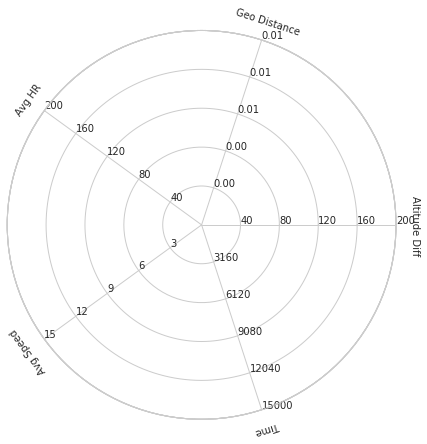

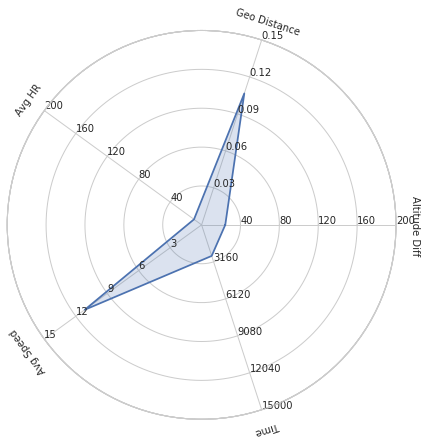

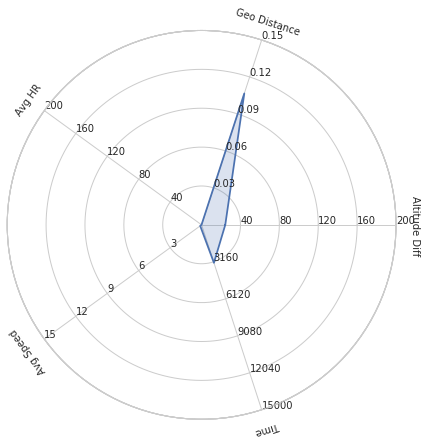

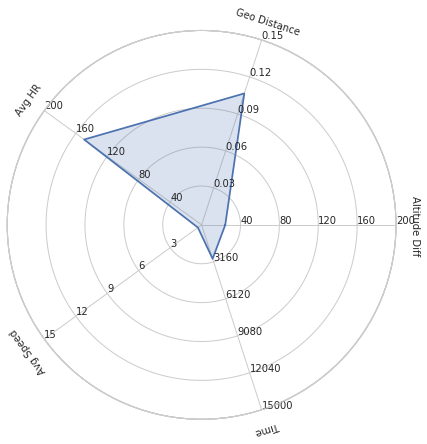

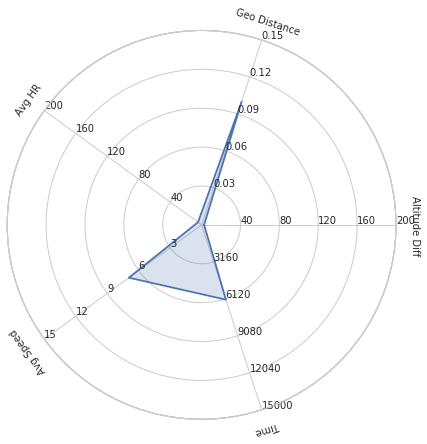

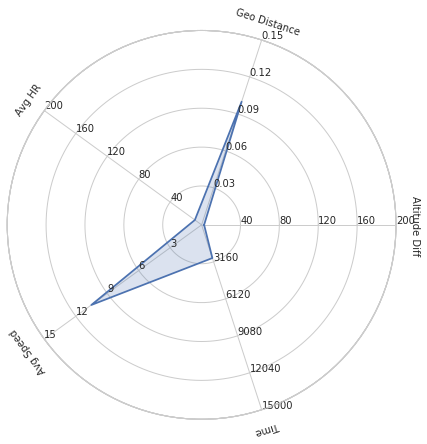

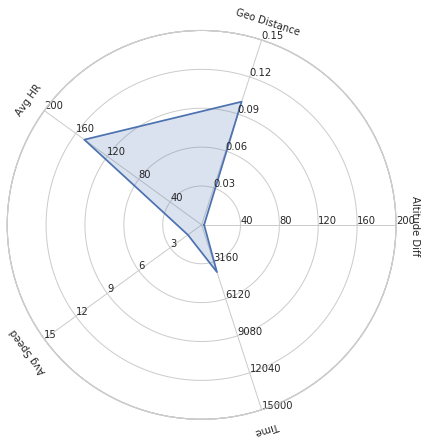

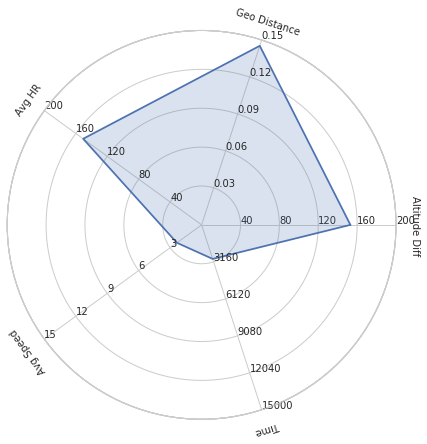

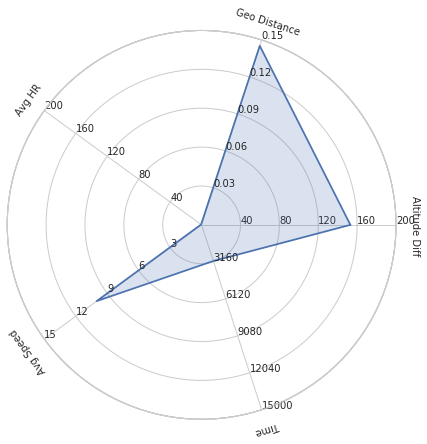

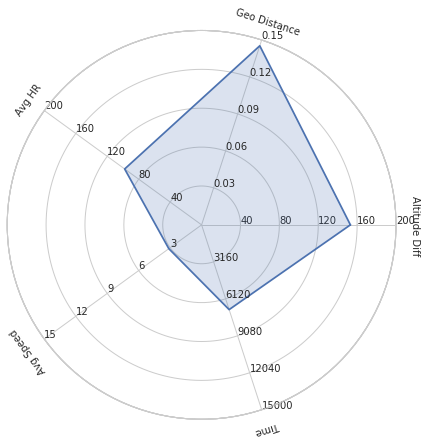

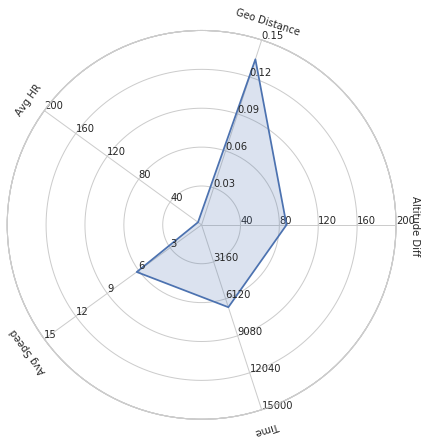

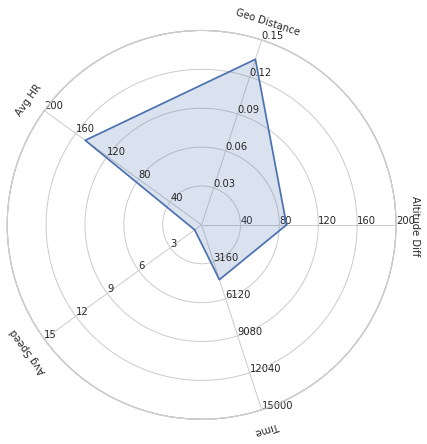

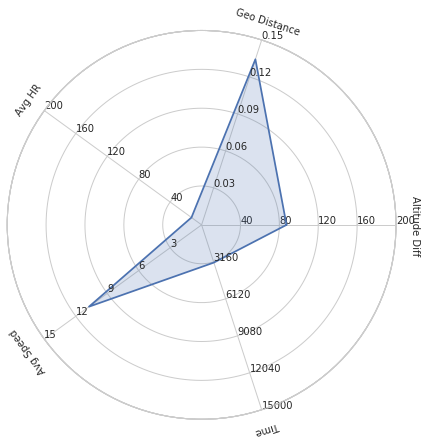

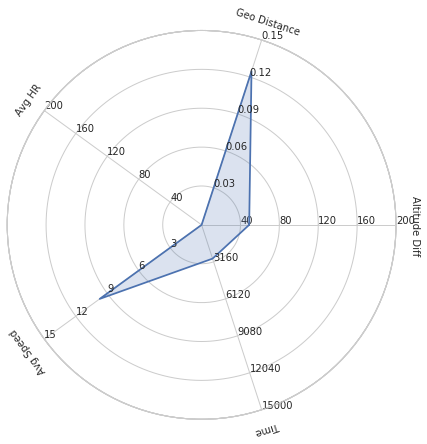

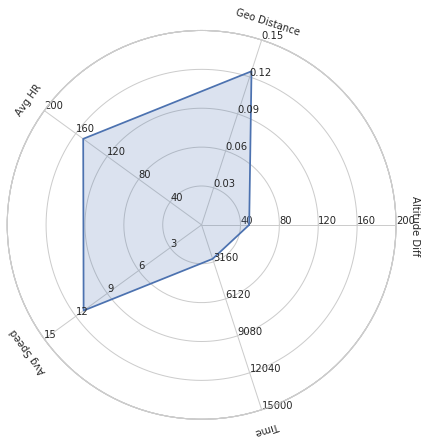

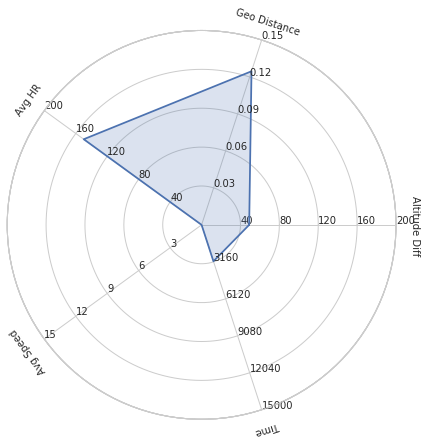

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
    
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
           
            
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            if i == 1:
                gridlabel = ['{0:.2f}'.format(x).format(round(x,2)) 
                             for x in grid]
            else: 
                gridlabel = ['{0:.0f}'.format(x).format(round(x,2)) 
                             for x in grid]
                
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data

for index, row in df.iterrows():

    variables = ("Altitude Diff", "Geo Distance", "Avg HR", "Avg Speed", "Time")
    data = row[1:].tolist()

    ranges = [(0.0001, 200), (0.0001, 0.15), (0.0001, 200),
             (0.0001, 15), (200, 15000)]            
    # plotting
    fig1 = plt.figure(figsize=(6, 6))
    radar = ComplexRadar(fig1, variables, ranges)
    radar.plot(data)
    radar.fill(data, alpha=0.2)
    
    plt.savefig("%s_output.png"%(index))
    plt.show()    
    


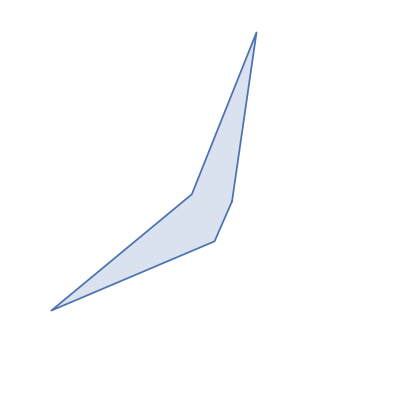

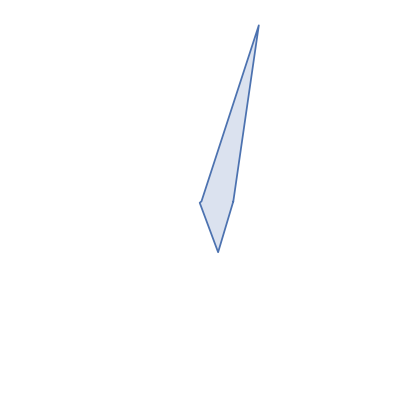

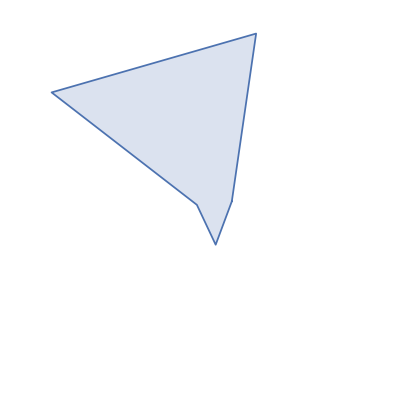

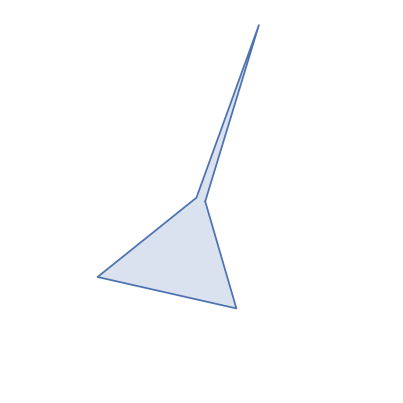

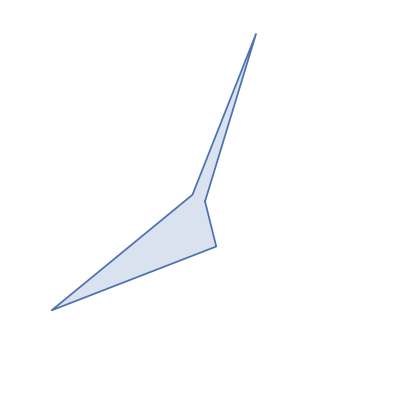

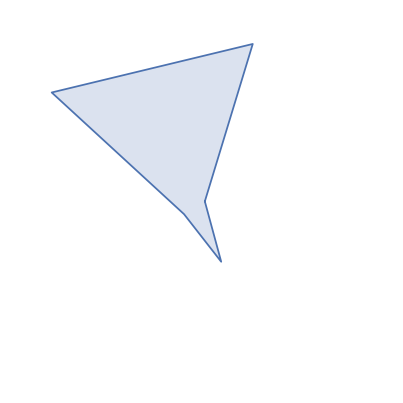

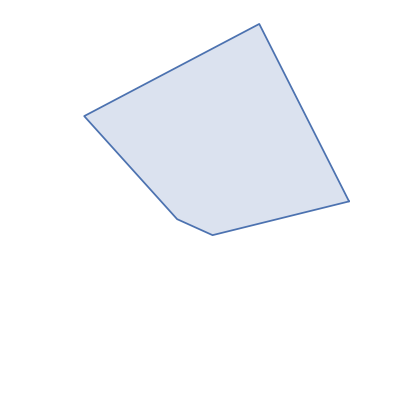

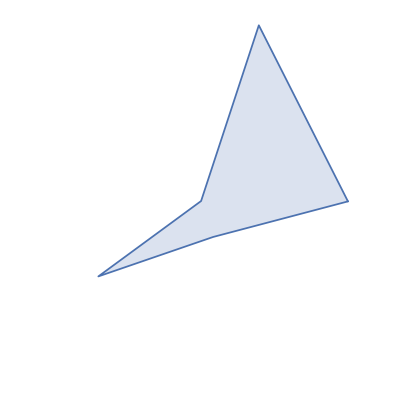

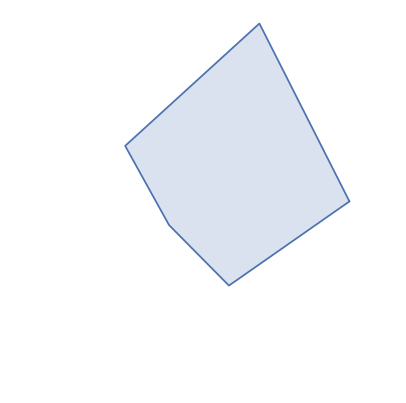

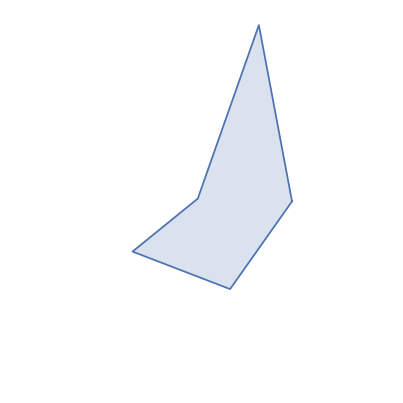

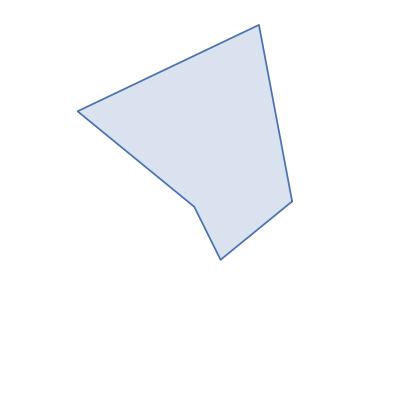

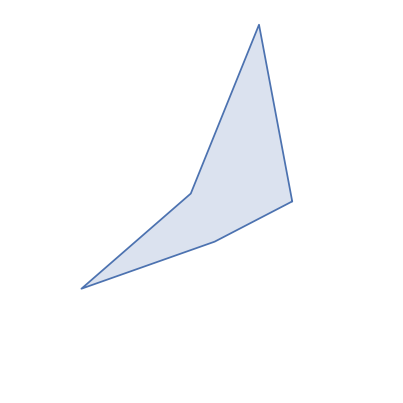

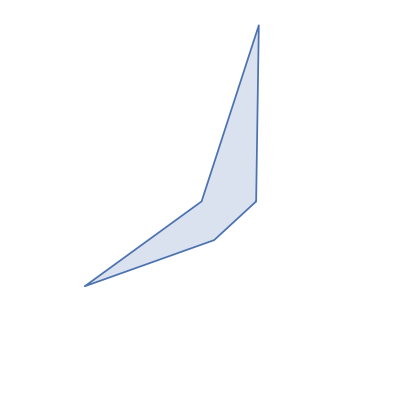

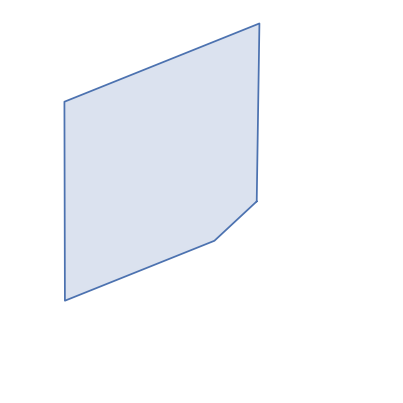

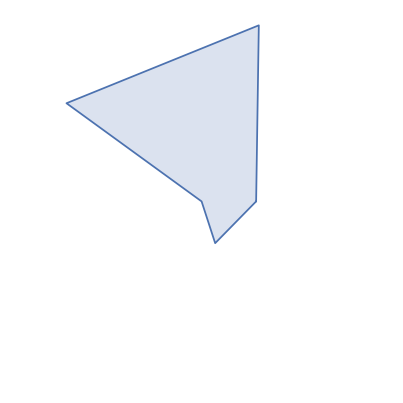

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
    
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            
            gridlabel = ["" for x in grid]
        
        if ranges[i][0] > ranges[i][1]:
            grid = grid[::-1] # hack to invert grid
                      # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
        self.ax.axis('off')
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data

for index, row in df.iterrows():

    variables = ("Altitude Diff", "Geo Distance", "Avg HR", "Avg Speed", "Time")
    data = row[1:].tolist()

    ranges = [(0.0001, 200), (0.0001, 0.15), (0.0001, 200),
             (0.0001, 15), (200, 15000)]            
    # plotting
    fig1 = plt.figure(figsize=(6, 6))
    radar = ComplexRadar(fig1, variables, ranges)
    radar.plot(data)
    radar.fill(data, alpha=0.2)
    
    plt.savefig("%s_output_shape_only.png"%(index))
    plt.show()    
    


In [52]:
df_for_correlation = pd.read_csv('df_for_correlation.csv').drop('Unnamed: 0', axis = 1)

df_test = df_for_correlation.sample(10000)

df_test

,diff_altitude,geo_distance,heart_rate_avg,speed_avg,elapsed_time
114453,43.000000,0.059639,176.760880,0.000000,1439.0
130911,25.944931,0.222500,159.132034,0.000000,3756.0
305776,42.903725,0.114163,0.000000,12.890913,2850.0
114260,25.038897,0.098925,153.046799,0.000000,2647.0
15712,20.288532,0.156901,0.000000,12.245551,3618.0
66658,0.000000,0.101086,0.000000,13.804406,2742.0
247732,0.000000,0.019763,0.000000,9.965370,553.0
81418,13.154190,0.055273,187.652893,0.000000,1317.0
125261,13.617016,0.125781,169.986298,0.000000,2999.0
7124,3.685121,0.029942,180.646805,0.000000,1440.0


Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f418403ee90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f417f48fbd0>]], dtype=object)

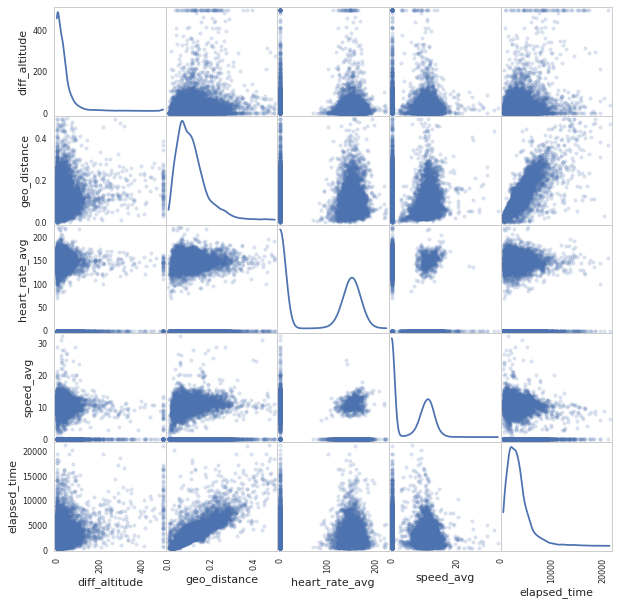

In [53]:
from pandas.tools.plotting import scatter_matrix
%pylab inline

scatter_matrix(df_test, alpha=0.2, figsize=(10, 10), diagonal='kde')

